# Assignment 3

# Problem 3

In this problem you will be working with the Olivetti Faces Dataset in order to explore the use of PCA in dimensionality reduction.

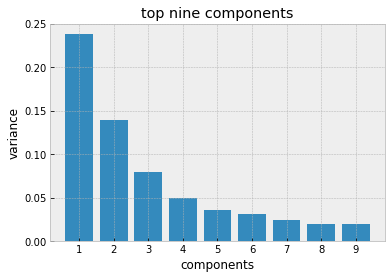

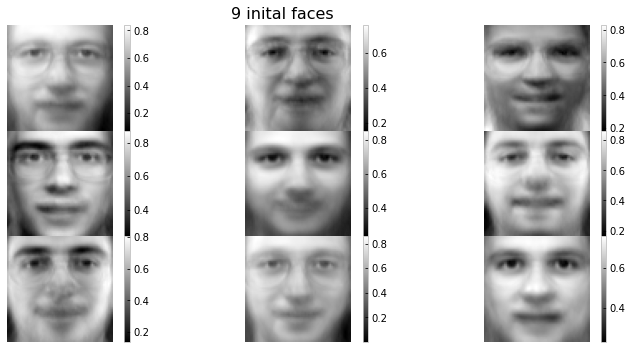

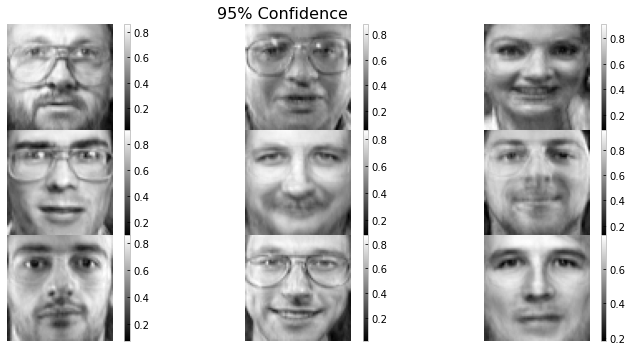

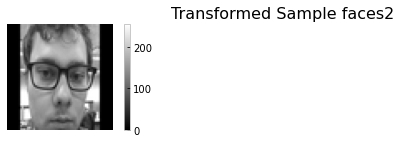

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import logging
from time import time
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from PIL import Image, ImageOps
from sklearn.decomposition import PCA

n_row = 3
n_col = 3
image_shape = (64, 64)
olivetti_data = fetch_olivetti_faces(shuffle=True)
faces = olivetti_data.data
n_samples, n_features = faces.shape

## boilerplate from sckikit learn

def plot_faces(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, size=16)
    for idc, image in enumerate(images):
        plt.subplot(n_row, n_col, idc + 1)
        image = image.reshape(image_shape)
        plt.imshow(image, cmap='gray')
        plt.colorbar(); plt.axis("off");
    plt.subplots_adjust(.01, .05, .99, .93, .04, 0.)




## A lot of collaboration was done with my project group so we might have some similar code. 
#However, we independently worked out a lot of parts. 

pca =PCA(n_components = 9)
pca.fit(faces)
def plotVariance(variance):    
    plt.bar(np.arange(1, 10), variance)
    plt.xticks(np.arange(1, 10))
    plt.xlabel("components")
    plt.ylabel("variance")
    plt.title("top nine components")
    plt.show()

plotVariance(pca.explained_variance_ratio_)

### 1

def getTransform(data, pca):
    transform = pca.fit_transform(faces)
    inverse = pca.inverse_transform(transform)
    return transform, inverse

trans, invert = getTransform(faces, pca)
plot_faces("9 inital faces", invert[:9, :])


# comput min pCA for 95% coverage. 
new_pca = PCA()
new_pca.fit(faces)
cumsum = np.cumsum(new_pca.explained_variance_ratio_)
min_pc = np.argmax(cumsum >= .95) - 1


##reconstruct first 9 faces

ninety_five_pca = PCA(n_components = min_pc)
trans, inverse2 = getTransform(faces, ninety_five_pca)
plot_faces("95% Confidence", inverse2[:9, :])

##Take a picture of yourself and format as 64*64  and retransform

def transformImage(location):
    image = Image.open(location)
    image = image.rotate(270)
    image = image.convert("L")
    image = image.getchannel("L")
    image = image.resize((64, 64), 1)
    return image

image = transformImage("Me.JPG")

def transformToVector(image):
    me = np.array(image)
    me = me.reshape((4096, ))
    return me
me = transformToVector(image)
faces = np.vstack((faces, me))
ninety_five_pca = PCA(n_components=1)
transform_data = ninety_five_pca.fit_transform(faces)
reconstructed_faces = ninety_five_pca.inverse_transform(transform_data)
plot_faces("Transformed Sample faces2", reconstructed_faces[400:, :])

1. Use PCA to find 9 eigenvectors that correspond to the largest eigenvalues of the covariance matrix (principal components or eigenfaces). Describe what the 9 principal components represent and plot them. Hint: Feel free to use libraries to complete this task. Highly recomend looking into sklearn PCA.

2. Reconstruct the first 9 face images using the 9 principal components.

3. Compute the minimum number of principal components needed to cover 95% of the eigenspace.

4. Reconstruct the first 9 face images using the number of principal components computed in part 3.

5. Take a picture of yourself and format it as a 64 x 64, black and white image. Repeat part 4 for the image of yourself.

